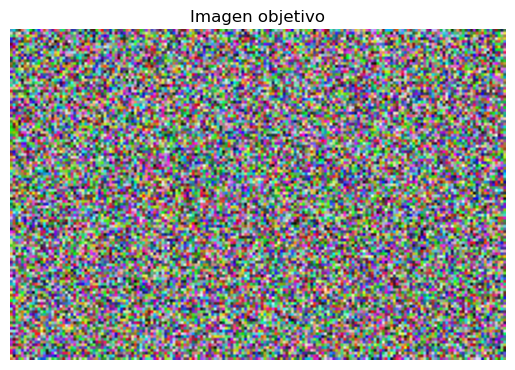

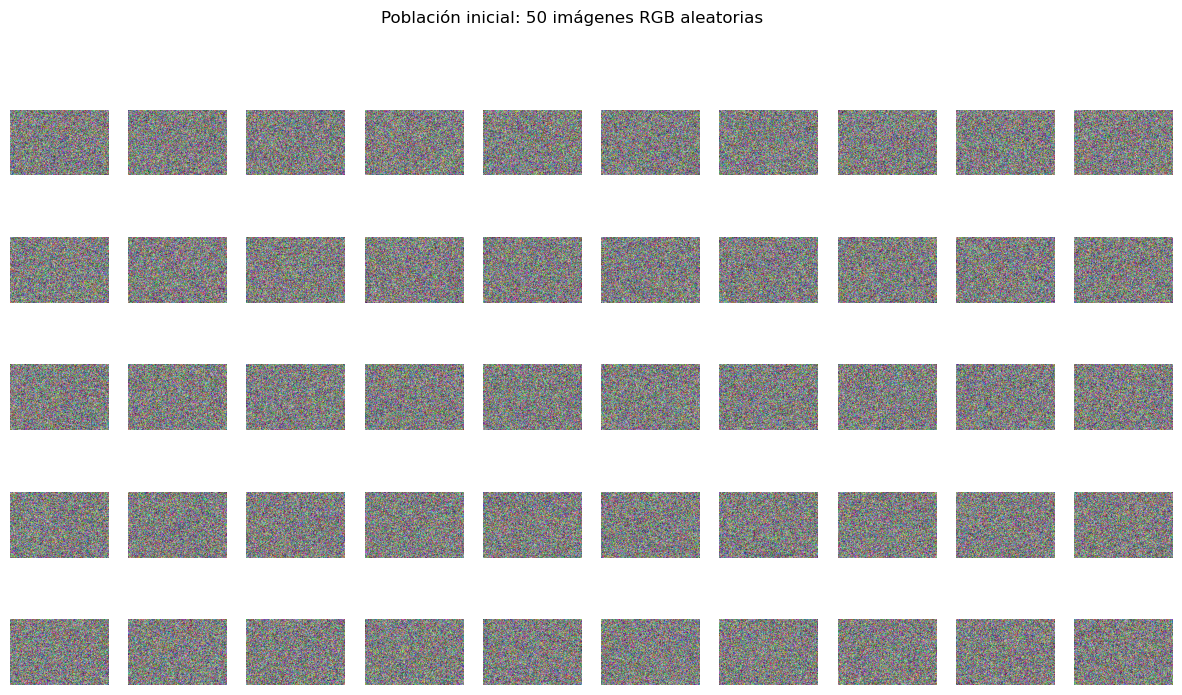

Generación   0 | Mejor MSE: 10889.89
Generación  20 | Mejor MSE: 10876.83
Generación  40 | Mejor MSE: 10861.48
Generación  60 | Mejor MSE: 10845.11
Generación  80 | Mejor MSE: 10828.23
Generación 100 | Mejor MSE: 10810.68
Generación 120 | Mejor MSE: 10793.69
Generación 140 | Mejor MSE: 10771.58
Generación 160 | Mejor MSE: 10753.58
Generación 180 | Mejor MSE: 10735.45


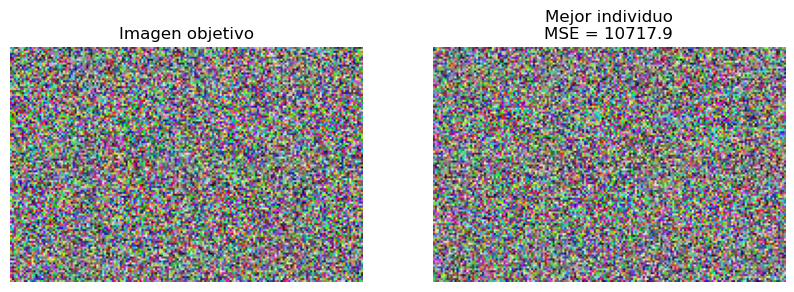

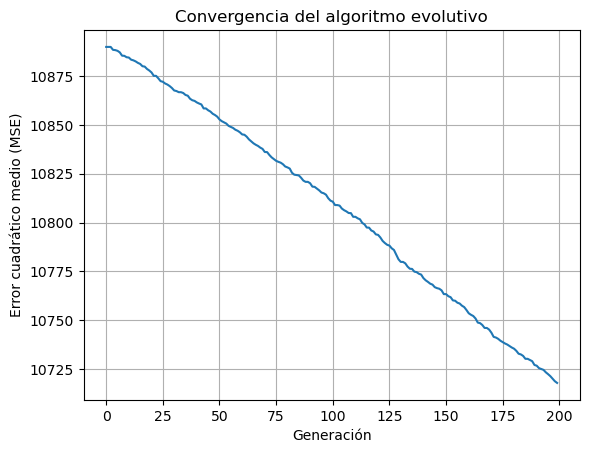

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# PARÁMETROS DEL PROBLEMA
# ============================================================
# Dimensiones de la imagen (120 x 180) con 3 canales RGB
IMG_H = 120
IMG_W = 180
CHANNELS = 3

# Tamaño de la población
POP_SIZE = 50

# Número de generaciones del algoritmo evolutivo
GENERATIONS = 200

# Probabilidad de mutación por píxel
MUTATION_RATE = 0.01


# ============================================================
# IMAGEN OBJETIVO (FUNCIÓN DE APTITUD)
# ============================================================
# Esta imagen representa el objetivo al cual el algoritmo
# evolutivo intentará aproximarse
target = np.random.randint(
    0, 256,
    (IMG_H, IMG_W, CHANNELS),
    dtype=np.uint8
)

# Visualización de la imagen objetivo
plt.imshow(target)
plt.title("Imagen objetivo")
plt.axis("off")
plt.show()


# ============================================================
# GENERACIÓN DE IMÁGENES ALEATORIAS
# ============================================================
# Crea una imagen RGB aleatoria con valores entre 0 y 255
def make_random_image():
    return np.random.randint(
        0, 256,
        (IMG_H, IMG_W, CHANNELS),
        dtype=np.uint8
    )


# ============================================================
# POBLACIÓN INICIAL
# ============================================================
# Se genera la población inicial compuesta por 50 imágenes
# completamente aleatorias
population = [make_random_image() for _ in range(POP_SIZE)]


# ============================================================
# VISUALIZACIÓN DE LA POBLACIÓN INICIAL
# ============================================================
# Se presentan las 50 matrices como imágenes RGB
fig, axes = plt.subplots(5, 10, figsize=(15, 8))

for ax, img in zip(axes.flat, population):
    ax.imshow(img)
    ax.axis("off")

plt.suptitle("Población inicial: 50 imágenes RGB aleatorias")
plt.show()


# ============================================================
# FUNCIÓN DE APTITUD (FITNESS)
# ============================================================
# Se utiliza el Error Cuadrático Medio (MSE) entre la imagen
# candidata y la imagen objetivo
# Un valor menor indica mayor aptitud
def fitness(img, target):
    return np.mean(
        (img.astype(np.float32) - target.astype(np.float32)) ** 2
    )


# ============================================================
# OPERADOR DE MUTACIÓN
# ============================================================
# Modifica aleatoriamente algunos píxeles de la imagen
# introduciendo pequeñas variaciones en sus valores RGB
def mutate(img, rate=MUTATION_RATE):

    # Máscara que define qué píxeles se mutan
    mask = np.random.rand(*img.shape) < rate

    # Ruido aleatorio para la mutación
    noise = np.random.randint(-20, 21, img.shape)

    # Se convierte a int16 para evitar desbordamientos
    mutated = img.astype(np.int16)

    # Aplicación de la mutación
    mutated[mask] += noise[mask]

    # Se limita el rango a [0, 255] y se retorna a uint8
    return np.clip(mutated, 0, 255).astype(np.uint8)


# ============================================================
# PROCESO EVOLUTIVO
# ============================================================
# Se almacena el historial del mejor fitness por generación
history = []

for gen in range(GENERATIONS):

    # Evaluación de toda la población
    scored = [(fitness(img, target), img) for img in population]

    # Ordenamiento por aptitud (menor error primero)
    scored.sort(key=lambda x: x[0])

    # Se selecciona el mejor individuo de la generación
    best_mse, best_img = scored[0]
    history.append(best_mse)

    # SELECCIÓN (elitismo): se conservan los mejores individuos
    survivors = [img for _, img in scored[:10]]  # 20 % de la población

    # REPRODUCCIÓN: generación de nuevos individuos por mutación
    population = survivors.copy()
    while len(population) < POP_SIZE:
        parent = survivors[np.random.randint(len(survivors))]
        population.append(mutate(parent))

    # Información de progreso
    if gen % 20 == 0:
        print(f"Generación {gen:3d} | Mejor MSE: {best_mse:.2f}")


# ============================================================
# RESULTADO FINAL
# ============================================================
# Comparación entre la imagen objetivo y el mejor individuo
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(target)
ax[0].set_title("Imagen objetivo")
ax[0].axis("off")

ax[1].imshow(best_img)
ax[1].set_title(f"Mejor individuo\nMSE = {best_mse:.1f}")
ax[1].axis("off")

plt.show()


# ============================================================
# GRÁFICA DE CONVERGENCIA
# ============================================================
# Se muestra la evolución del error a lo largo de las generaciones
plt.plot(history)
plt.xlabel("Generación")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Convergencia del algoritmo evolutivo")
plt.grid()
plt.show()



En este trabajo generé una población inicial de 50 imágenes RGB de tamaño 120×180 con valores en 
0
,
255
0,255 y la presenté gráficamente, cumpliendo exactamente el enunciado del problema.

Definí la función de aptitud como el error cuadrático medio (MSE) frente a una imagen objetivo y usé un esquema evolutivo simple (selección elitista del 20% + reproducción por mutación) para aproximar esa imagen.

El algoritmo mostró convergencia: el MSE del mejor individuo disminuye con las generaciones y la gráfica de convergencia permite visualizar la mejora progresiva. Sin embargo, la velocidad y la calidad de la aproximación dependen fuertemente de la semilla aleatoria, la tasa de mutación y el número de generaciones.

La estrategia basada únicamente en mutación (sin crossover) consigue aproximaciones visibles a la imagen objetivo, pero tiende a estancarse en mínimos locales. Se observó que mutaciones pequeñas conservan rasgos útiles pero requieren más generaciones para lograr una buena reconstrucción global.

Limitaciones prácticas importantes: el criterio de MSE no captura bien la percepción visual (p. ej. texturas y estructura), y el coste computacional crece linealmente con la población y las generaciones. Para imágenes más complejas o mayor resolución, el tiempo de ejecución aumenta notablemente.

Mejoras recomendadas: introducir operadores de cruce (crossover), usar elitismo más controlado, experimentar con tasas de mutación adaptativas, aumentar población/generaciones según recursos, y evaluar métricas perceptuales como SSIM o pérdidas basadas en características (por ejemplo, funciones de un modelo entrenado) para medir aptitud más acorde con la percepción humana.

Optimización y escalabilidad: vectorizar evaluaciones, paralelizar la evaluación de fitness (por CPU/GPU) o usar frameworks numéricos acelerados reducirá el tiempo total. Además, fijar la semilla aleatoria en pruebas permite reproducibilidad para la presentación.